## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 1us/step


In [2]:
keras.__version__

'2.2.4'

In [3]:
tf.keras.__version__

'2.2.4-tf'

In [4]:
print(y_test[0:5])

[9 2 1 1 6]


In [5]:
y_test.view()

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### Find no.of samples are there in training and test datasets

In [0]:

import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt

In [7]:
print('Traning data set', x_train.shape)
print('Test data set', x_test.shape)

Traning data set (60000, 28, 28)
Test data set (10000, 28, 28)


### Find dimensions of an image in the dataset

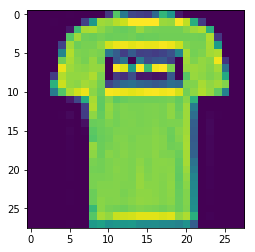

In [8]:
plt.imshow(x_train[1,:,:])

In [9]:
x_train[1,:,:].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [10]:
#Encoding the output class label (One-Hot Encoding)
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train/255
x_test = x_test/255

In [12]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_test = x_test.reshape(10000,28,28,1)

In [0]:
x_train= x_train.reshape(60000,28,28,1)

In [15]:
x_train.shape

(60000, 28, 28, 1)

In [16]:
x_test.shape

(10000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from sklearn import metrics

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
#normalize data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))


#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer 1
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Dense layer 2 / output layers

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#from tfkeras.callbacks import EarlyStopping
es= tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [40]:
#Train the model
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=10,
          batch_size=1000,callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5784 - acc: 0.7939 - val_loss: 0.8463 - val_acc: 0.8366
Epoch 2/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3283 - acc: 0.8836 - val_loss: 0.5433 - val_acc: 0.8676
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2731 - acc: 0.9015 - val_loss: 0.3564 - val_acc: 0.8940
Epoch 4/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2397 - acc: 0.9132 - val_loss: 0.3279 - val_acc: 0.8849
Epoch 5/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2106 - acc: 0.9238 - val_loss: 0.2813 - val_acc: 0.9000
Epoch 6/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.1871 - acc: 0.9324 - val_loss: 0.2672 - val_acc: 0.9041
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.1613 - acc: 0.9420 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
#normalize data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Dropout(0.25))


#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer 1
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Dense layer 2 / output layers

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])




In [0]:
#from tfkeras.callbacks import EarlyStopping
es= tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

In [70]:
#Train the model
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=10,
          batch_size=32,callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.3681 - acc: 0.8672 - val_loss: 0.2913 - val_acc: 0.8933
Epoch 2/10
60000/60000 [==============================] - 9s 145us/sample - loss: 0.2436 - acc: 0.9097 - val_loss: 0.2446 - val_acc: 0.9120
Epoch 3/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1984 - acc: 0.9272 - val_loss: 0.2260 - val_acc: 0.9197
Epoch 4/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1637 - acc: 0.9385 - val_loss: 0.2293 - val_acc: 0.9197
Epoch 5/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1387 - acc: 0.9478 - val_loss: 0.2229 - val_acc: 0.9219
Epoch 6/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1158 - acc: 0.9567 - val_loss: 0.2376 - val_acc: 0.9207
Epoch 7/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0970 - acc: 0.9632 - val_l

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

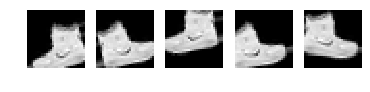

In [62]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [73]:

model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
                          epochs=50,
                          validation_data=(x_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7544 - acc: 0.7244 - val_loss: 0.4221 - val_acc: 0.8484
Epoch 2/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5617 - acc: 0.7924 - val_loss: 0.3634 - val_acc: 0.8734
Epoch 3/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5084 - acc: 0.8102 - val_loss: 0.3534 - val_acc: 0.8726
Epoch 4/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4770 - acc: 0.8231 - val_loss: 0.3513 - val_acc: 0.8719
Epoch 5/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4645 - acc: 0.8287 - val_loss: 0.3427 - val_acc: 0.8776
Epoch 6/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4490 - acc: 0.8326 - val_loss: 0.3447 - val_acc: 0.8750
Epoch 7/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4319 - acc: 0.8403 - val_loss: 0.3269 - val_acc: 0.8841
Epoch 8/50
1875/1875 [==========================

###  Report the final train and validation accuracy

In [76]:
score=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.3229 - acc: 0.8834


In [77]:
score

[0.32285626868009565, 0.8834]

In [0]:
y_predict = model.predict(x_test)

In [79]:
y_predict[0]

array([8.2056761e-07, 1.3018322e-06, 6.3314038e-09, 1.9656497e-06,
       1.1130441e-07, 5.8670794e-05, 4.1371490e-07, 3.0521251e-02,
       2.4894715e-07, 9.6941525e-01], dtype=float32)

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo multiple                  4         
_________________________________________________________________
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  5

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
import tensorflow as tf
import keras


### **Load CIFAR10 dataset**

In [80]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [88]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [82]:
x_train.shape

(50000, 32, 32, 3)

In [83]:
x_test.shape

(10000, 32, 32, 3)

In [85]:
y_train.shape

(50000, 1)

In [86]:
y_test.shape

(10000, 1)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_cifar10_gen = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               rotation_range=30)

### **Prepare/fit the generator.**

In [0]:
data_cifar10_gen.fit(x_train)

In [91]:
x_train.shape

(50000, 32, 32, 3)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

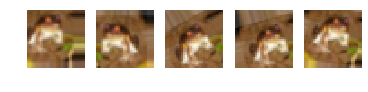

In [93]:
from matplotlib import pyplot as plt
import numpy as np
gen = data_cifar10_gen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().astype(np.uint8).squeeze())
    plt.plot()
plt.show()